# Edit dataset

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid
import random
import torch

dataset=Planetoid(root=r"./Cora777777777",name="Cora")

In [2]:
print(" The number of classes contained in the network data :",dataset.num_classes)
print(" Number of characteristics of network data edge :",dataset.num_edge_features)
print(" Number of network data sides :",dataset.data.edge_index.shape[1]/2) #  Divide 2 yes OOC The organizational form of 
print(" Characteristic number of network data nodes :",dataset.num_node_features)
print(" Number of network data nodes :",dataset.data.x.shape[0])


 The number of classes contained in the network data : 7
 Number of characteristics of network data edge : 0
 Number of network data sides : 5278.0
 Characteristic number of network data nodes : 1433
 Number of network data nodes : 2708


## Create numpy arrays from Data (dataset.data)

In [3]:
# Graph connectivity in COO format with shape [2, num_edges]
edge_index = np.array(dataset.data.edge_index);

# Edge feature matrix with shape [num_edges, num_edge_features]
edge_attr = np.array(dataset.data.edge_attr); #None

# Node feature matrix with shape [num_nodes, num_node_features]
x = np.array(dataset.data.x)

# Graph-level or node-level ground-truth labels with arbitrary shape.
y = np.array(dataset.data.y)

# Node position matrix with shape [num_nodes, num_dimensions]
pos = dataset.data.pos #None

# Rest
batch = dataset.data.batch #None
keys = dataset.data.keys
edge_weight = np.array(dataset.data.edge_weight) #None
node_stores = np.array(dataset.data.node_stores) #?
edge_stores = np.array(dataset.data.edge_stores) #?

# Edit arrays and save them to a new Data object

classData(x: Optional[Tensor] = None, edge_index: Optional[Tensor] = None, edge_attr: Optional[Tensor] = None, y: Optional[Tensor] = None, pos: Optional[Tensor] = None, **kwargs)

In [4]:
def deleteMostConnectedEdge(dataset):
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = np.array(dataset.data.edge_index);
    left = edge_index[0]
    right = edge_index[1]

    count_edge_0 = np.bincount(edge_index[0])
    max_edge_0 = np.max(count_edge_0) 

    count_edge_1 = np.bincount(edge_index[1])
    print(len(count_edge_1))
    max_edge_1 = np.max(count_edge_1)  

    # Get the index of elements; index == edge
    index_max_0 = np.where(count_edge_0 == max_edge_0)
    print(index_max_0)
    index_max_1 = np.where(count_edge_1 == max_edge_1)
    print(index_max_1)
    #Sort for finding several most connected
    #sorted = np.sort(count_edge_0)
    new_edges_left = np.delete(left, np.where(left == index_max_0))
    new_edges_right = np.delete(right, np.where(right == index_max_1))

    return np.array([new_edges_left, new_edges_right])
    
edge_index_delete_most_connected = deleteMostConnectedEdge(dataset)
    

2708
(array([1358], dtype=int64),)
(array([1358], dtype=int64),)


In [5]:
def deleteRandomEdge(dataset, n):
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = np.array(dataset.data.edge_index);
    left = edge_index[0]
    right = edge_index[1]
    count_edge_0 = np.bincount(edge_index[0])

    # Generate n random edges
    randomlist = random.sample(range(0, len(count_edge_0)), n)
    #print(randomlist)
    for re in range(len(randomlist)):
        left = np.delete(left, np.where(left == randomlist[re]))
        right = np.delete(right, np.where(right == randomlist[re]))

    return np.array([left, right])

edge_index_delete_random = deleteRandomEdge(dataset, 600)

In [6]:
def addRandomEdge(dataset, n):
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = np.array(dataset.data.edge_index);
    left = edge_index[0]
    right = edge_index[1]

    count_edge_0 = np.bincount(edge_index[0])
    count_edge_1 = np.bincount(edge_index[1])

    # Generate n random edges
    randomlist_left = random.sample(range(0, len(count_edge_0)), n)
    for re in range(len(randomlist_left)):
        left = np.append(left, randomlist_left[re])
    
    randomlist_right = random.sample(range(0, len(count_edge_1)), n)
    for re in range(len(randomlist_right)):
        right = np.append(right, randomlist_right[re])

    return np.array([left, right]) 

edges_add_random = addRandomEdge(dataset, 600)

In [7]:
edge_index_delete_random = torch.tensor(edge_index_delete_random)

In [8]:
from torch_geometric.data import Data
dataset_new = Data(x=dataset.data.x, y=dataset.data.y, edge_index=edge_index_delete_random)

In [12]:
dataset = Data(x=dataset.data.x, y=dataset.data.y, edge_index=dataset.data.edge_index)

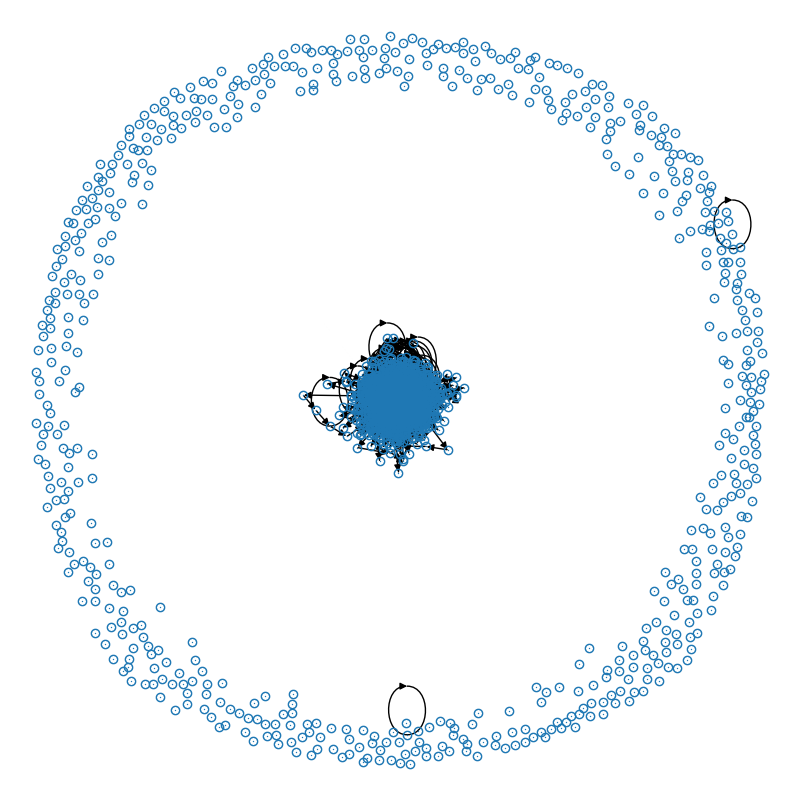

In [15]:
from torch_geometric.utils.convert import to_networkx
dataset_new.to_dict()
%matplotlib widget
vis = to_networkx(dataset_new)
plt.figure(1,figsize=(8,8)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=1,linewidths=6)
plt.show()



In [10]:
print(dataset_new.has_self_loops)

<bound method BaseData.has_self_loops of Data(x=[2708, 1433], edge_index=[2, 8297], y=[2708])>
